# Monte Carlo Chess

Can you calibrate a probability distribution on pieces and their points to make a random game of chess converge towards mate faster?
- vary board size and try custom rules I thought of
    - like cellular automata
    - also with multiple moves at once

- Simulated annealing?

cOnnection to criticality and ising model, spin glasses

then deploy to Javascript as fun website widget

random walk gist:
```python
for t in range(moves):
    team_turn = TEAMS[t%2]
    avail_pieces = pieces[team_turn]
    if avail_pieces['K'].check:
        #move to prevent check
        # if no moves, king.mate=True
    else: 
        piece = random.choice(avail_pieces)
        piece.move('random')
```

maybe `castle` should be it's own piece in avail_pieces?

resources:
- [minimax](https://diatomenterprises.com/ruby-and-recursion-find-out-all-possible-chess-knights-movements-using-minimax-algorithm/)

# todo
- Castle, en passant, and promotion
- Another analysis: how space of combinatorial possibilities changes over time


[(3, 4)]


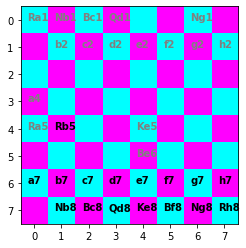

In [1]:
%matplotlib inline
from chess.game import Chess, TEAMS, COLORS

game = Chess()
game.move('a2', (0,3))
game.pick('Ke1').position = (4,4) #GOOD K
game.pick('Rh1').position = (0,4) #GOOD ROOK
game.pick('Bf1').position = (4,5) #GOOD BISH
# game.pick('Ng1').position = (3,5) #GOOD KNIGHT

# game.move('d7', (3,5))
game.pick('Ra8').position = (1,4) #BAD ROOK
print()
print(game.pick('Be6').valid_moves(game))
# print(game.pick('Ke5').valid_moves(game))
game.show()

# Random game!

Need way to tell if there is stalemate

Debugging:

Some pieces have 

In [22]:
game.teams(with_moves=True)[TEAMS[i%2]]

ValueError: too many values to unpack (expected 2)

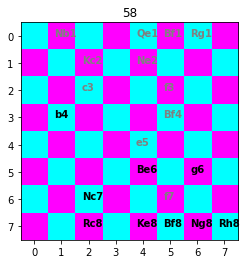

In [1]:
%matplotlib inline
from chess.game import Chess, TEAMS, COLORS
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
mate = False
game = Chess()
i = 0
2
while not mate:
    try:
        piece = random.sample(game.teams(with_moves=True)[TEAMS[i%2]], 1)[0]
    except ValueError: # when no available moves
        mate = True 
    i+=1
    game.move(piece, 'random', history=True)
    game.show(title=i)
    clear_output(wait=True)
    plt.show()

In [17]:
for t in ('w','b'):
    print(f'---------------{t}---------')
    for p in game.teams()[t]:
        
        try:
            print(p, game.pick(p).valid_moves(game))
        except:
            print(f'Nothing to unpace in {p}\'s moves in check_test(self, game, m)')
        

---------------w---------
c3 [(2, 3), (1, 3)]
e5 []
f3 []
Nothing to unpace in f7's moves in check_test(self, game, m)
Rg1 [(6, 1), (7, 0), (6, 2), (6, 3), (6, 4), (6, 5)]
Nb1 [(0, 2), (3, 1)]
Ne2 [(2, 0), (3, 3), (6, 2)]
Bf4 [(6, 2), (6, 4), (4, 2), (7, 1), (7, 5), (3, 1), (2, 0)]
Bf1 [(6, 1), (7, 2)]
Qe1 [(3, 0), (3, 1), (5, 1), (2, 0), (6, 2), (7, 3)]
Kc2 [(1, 1), (2, 0), (3, 1), (3, 0), (3, 2)]
---------------b---------
b4 []
g6 []
Rc8 []
Rh8 []
Nc7 []
Ng8 []
Be6 [(5, 6)]
Bf8 []
Ke8 [(3, 7), (4, 6), (5, 6), (3, 6)]


In [12]:
import sys
sys.getsizeof(game.history)

536

In [2]:
mate

True

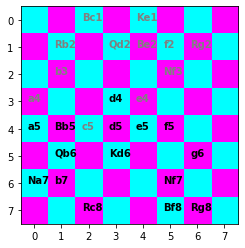

In [22]:
game.show(game.history[1])

In [39]:
game.pieces

[a4,
 a5,
 a4,
 b2,
 c4,
 c5,
 d4,
 d5,
 e3,
 d3,
 f2,
 e2,
 h4,
 h4,
 h3,
 h4,
 Rc1,
 Ra8,
 Rg3,
 Rh5,
 Na2,
 Nd7,
 Nh2,
 Ng4,
 Ba3,
 Ba4,
 Be2,
 Bf6,
 Qd3,
 Qg7,
 Kf1,
 Kc7]

In [26]:
game.teams()

{'w': ['a4',
  'c4',
  'd4',
  'e3',
  'f2',
  'h3',
  'Rc1',
  'Rg3',
  'Na2',
  'Nh2',
  'Ba3',
  'Kf1'],
 'b': ['a5',
  'b2',
  'c5',
  'd5',
  'e2',
  'h4',
  'Ra8',
  'Rh5',
  'Nd7',
  'Ng4',
  'Bf6',
  'Qg7',
  'Kc7']}

In [18]:
COLORS

{'w': 'gray', 'b': 'black'}